# 分支结构

## 并行分支

In [17]:
! pip install -U langgraph langchain_core

Looking in indexes: https://mirrors.aliyun.com/pypi/simple/

[notice] A new release of pip is available: 25.0.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


### 定义节点和边

In [18]:
import operator
from typing import Annotated
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
  value: Annotated[list, operator.add]

def a(state: State):
  print(f"""add a to {state['value']}""")
  return { 
    "value": ['A']
  }
def b(state: State):
  print(f"""add a to {state['value']}""")
  return { 
    "value": ['B']
  }
def c(state: State):
  print(f"""add a to {state['value']}""")
  return { 
    "value": ['C']
  }
def d(state: State):
  print(f"""add a to {state['value']}""")
  return { 
    "value": ['D']
  }

builder = StateGraph(State)
builder.add_node('a', a)
builder.add_node('b', b)
builder.add_node('c', c)
builder.add_node('d', d)

builder.add_edge(START, 'a')
builder.add_edge('a', 'b')
builder.add_edge('a', 'c')
builder.add_edge('b', 'd')
builder.add_edge('c', 'd')
builder.add_edge('d', END)

graph = builder.compile()

### 可视化图表

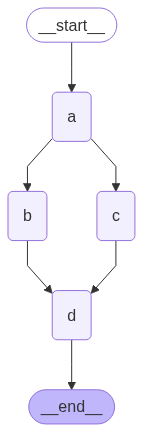

In [19]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

### 运行

In [20]:
graph.invoke({"value": []}, {"configurable": {"thread": 'foo'}})

add a to []
add a to ['A']
add a to ['A']
add a to ['A', 'B', 'C']


{'value': ['A', 'B', 'C', 'D']}

## 条件边和循环

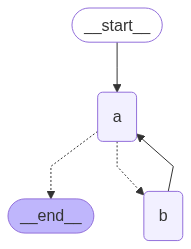

In [ ]:
import operator
from typing import Annotated, Literal
from typing_extensions import TypedDict
from langgraph.graph import StateGraph, START, END

class State(TypedDict):
  value: Annotated[list, operator.add]

def a(state: State):
  print(f"""add a to {state['value']}""")
  return { 
    "value": ['A']
  }
def b(state: State):
  print(f"""add a to {state['value']}""")
  return { 
    "value": ['B']
  }

def route(state: State) -> Literal['b', END]:
  if (len(state['value']) < 7):
    return 'b'
  else:
    return END



builder1 = StateGraph(State)
builder1.add_node('a', a)
builder1.add_node('b', b)

builder1.add_edge(START, 'a')
builder1.add_conditional_edges('a', route)
builder1.add_edge('b', 'a')

graph1 = builder1.compile()

display(Image(graph1.get_graph().draw_mermaid_png()))

### 调用

直到满足条件才退出循环

In [22]:
graph1.invoke({"value": []}, {"configurable": {"thread": 'foo'}})

add a to []
add a to ['A']
add a to ['A', 'B']
add a to ['A', 'B', 'A']
add a to ['A', 'B', 'A', 'B']
add a to ['A', 'B', 'A', 'B', 'A']
add a to ['A', 'B', 'A', 'B', 'A', 'B']


{'value': ['A', 'B', 'A', 'B', 'A', 'B', 'A']}

### 调用最大次数限制

In [25]:
from langgraph.errors import GraphRecursionError

try:
    graph1.invoke({"value": []}, {"recursion_limit": 3})
except GraphRecursionError as e:
    print(f"GraphRecursionError: {e}")

add a to []
add a to ['A']
add a to ['A', 'B']
GraphRecursionError: Recursion limit of 3 reached without hitting a stop condition. You can increase the limit by setting the `recursion_limit` config key.
For troubleshooting, visit: https://python.langchain.com/docs/troubleshooting/errors/GRAPH_RECURSION_LIMIT
